**Gated Recurrent Unit (GRU)**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/crop_yield.csv')

In [ ]:
scaler = StandardScaler()
df['Crop_Year_scaled'] = scaler.fit_transform(df[['Crop_Year']])
df['Area_scaled'] = scaler.fit_transform(df[['Area']])
df['Production_scaled'] = scaler.fit_transform(df[['Production']])
df['Annual_Rainfall_scaled'] = scaler.fit_transform(df[['Annual_Rainfall']])
df['Fertilizer_scaled'] = scaler.fit_transform(df[['Fertilizer']])
df['Pesticide_scaled'] = scaler.fit_transform(df[['Pesticide']])
df['Yield_scaled'] = scaler.fit_transform(df[['Yield']])

In [ ]:
label_encoder = LabelEncoder()
df['crop_encoded'] = label_encoder.fit_transform(df['Crop'])
df['season_encoded'] = label_encoder.fit_transform(df['Season'])
df['state_encoded'] = label_encoder.fit_transform(df['State'])

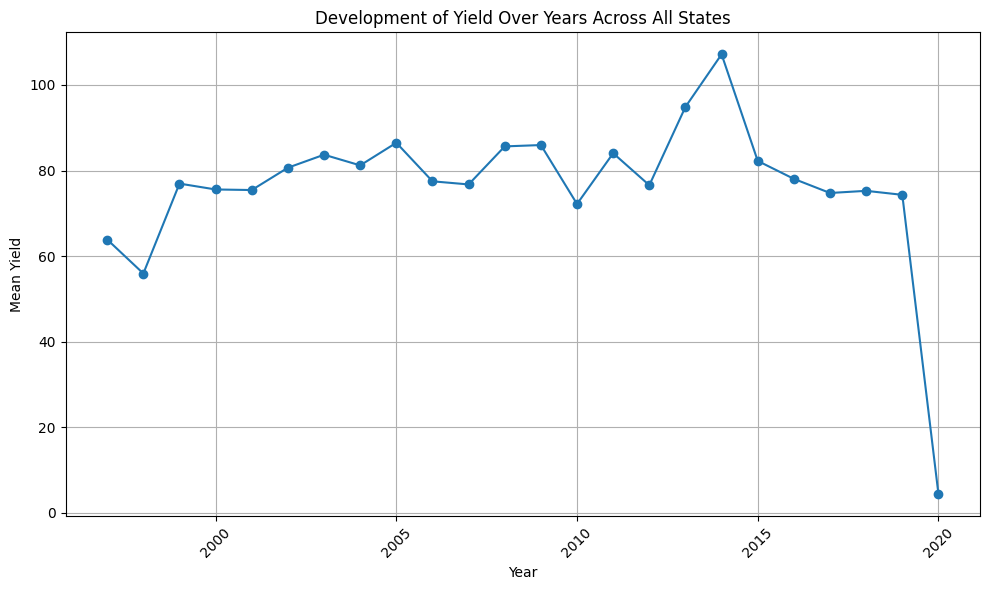

In [ ]:
yearly_yield = df.groupby('Crop_Year')['Yield'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
plt.title('Development of Yield Over Years Across All States')
plt.xlabel('Year')
plt.ylabel('Mean Yield')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

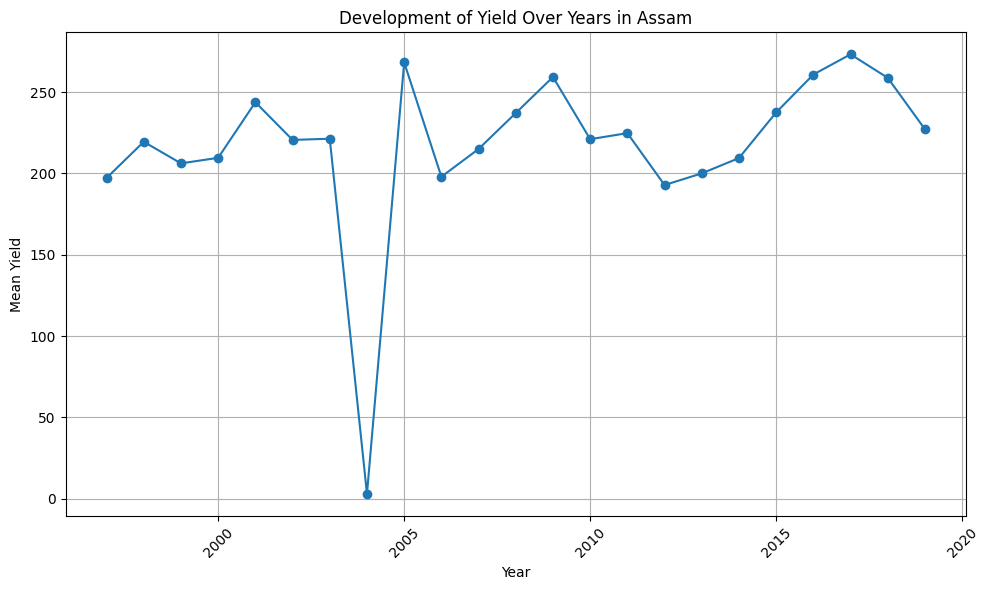

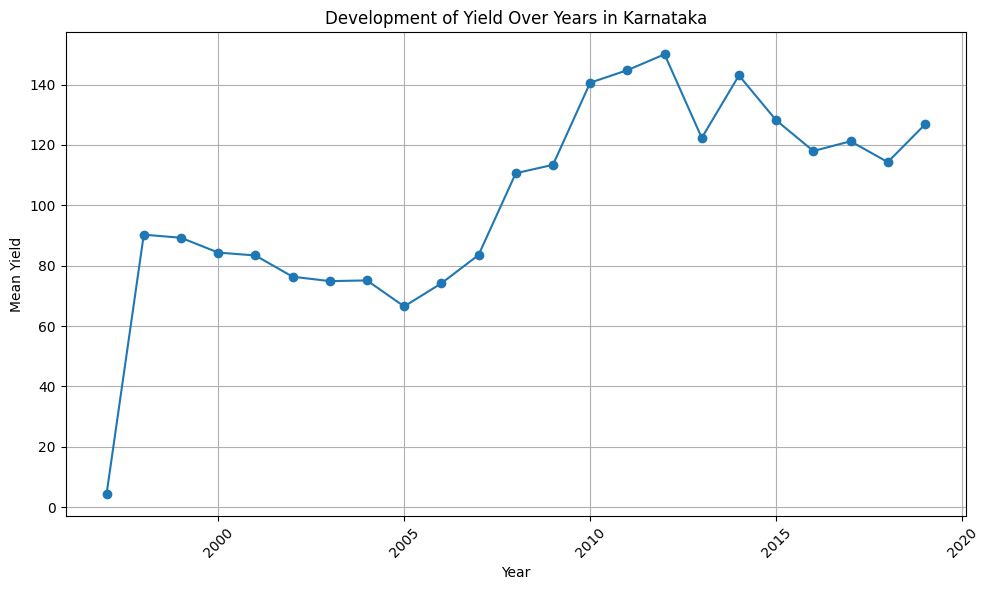

In [ ]:
states = df['State'].unique()

i = 0
for state in states:
    state_data = df[df['State'] == state]
    yearly_yield = state_data.groupby('Crop_Year')['Yield'].mean().reset_index()

    i += 1
    if i > 2:
        break

    plt.figure(figsize=(10, 6))
    plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
    plt.title(f'Development of Yield Over Years in {state}')
    plt.xlabel('Year')
    plt.ylabel('Mean Yield')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
features = ['Crop_Year_scaled', 'crop_encoded', 'state_encoded', 'Area_scaled', 'Production_scaled',
            'Annual_Rainfall_scaled', 'Fertilizer_scaled']
target = ['Yield_scaled']

X = df.loc[:, features]
Y = df.loc[:, target]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

In [ ]:
X_train_gru = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_gru = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
model = Sequential([
    GRU(units=100, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 100)                 │          32,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,801 (128.13 KB)

 Trainable params: 32,801 (128.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_gru, Y_train, epochs=150, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)


Epoch 1/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0513 - val_loss: 0.0547
Epoch 2/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0593 - val_loss: 0.0634
Epoch 3/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0535 - val_loss: 0.0524
Epoch 4/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0485 - val_loss: 0.0529
Epoch 5/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0455 - val_loss: 0.0500
Epoch 6/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0513 - val_loss: 0.0581
Epoch 7/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0497 - val_loss: 0.0490
Epoch 8/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0441 - val_loss: 0.0524
Epoch 9/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0399 - val_loss: 0.0573
Epoch 10/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0500 - val_loss: 0.0472
Epoch 11/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0487 - val_loss: 0.0476
Epoch 12/150
296/296 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
Y_pred = model.predict(X_test_gru)


247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("R-squared (R2):", r2)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.04062575935646181
R-squared (R2): 0.7655203938484192
Mean Squared Error: 0.2396668858044366


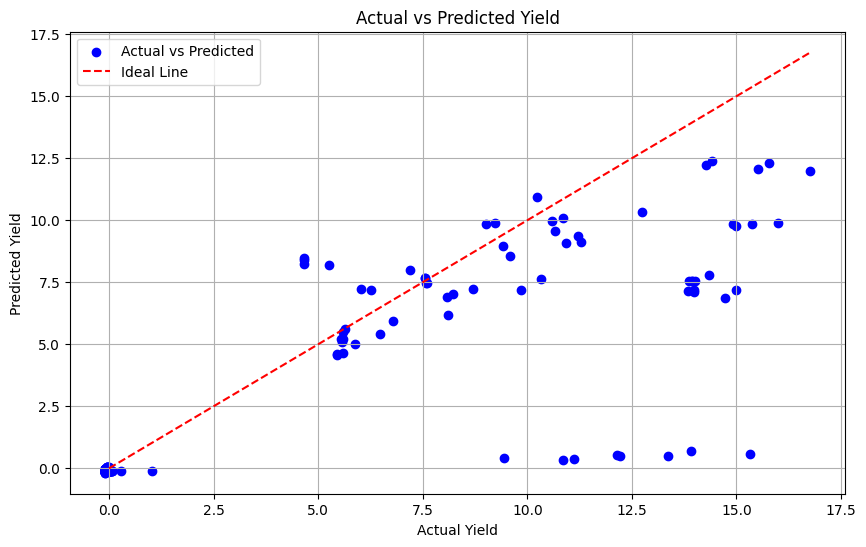

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test.values, Y_pred, color='blue', label='Actual vs Predicted')
max_val = np.max([np.max(Y_test), np.max(Y_pred)])
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()

**Recurrent Neural Network (RNN)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 100)              │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 100)              │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,401 (122.66 KB)

 Trainable params: 31,201 (121.88 KB)

 Non-trainable params: 200 (800.00 B)

Epoch 1/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2991 - val_loss: 0.1735
Epoch 2/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1646 - val_loss: 0.1272
Epoch 3/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1368 - val_loss: 0.1032
Epoch 4/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1093 - val_loss: 0.0949
Epoch 5/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0917 - val_loss: 0.0940
Epoch 6/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0974 - val_loss: 0.0894
Epoch 7/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1083 - val_loss: 0.0987
Epoch 8/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0892 - val_loss: 0.0889
Epoch 9/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0854 - val_loss: 0.0840
Epoch 10/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0980 - val_loss: 0.0828
Epoch 11/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0999 - val_loss: 0.0905
Epoch 12/150
296/296 ━━━━━━━━━━━━━━━━━━━━

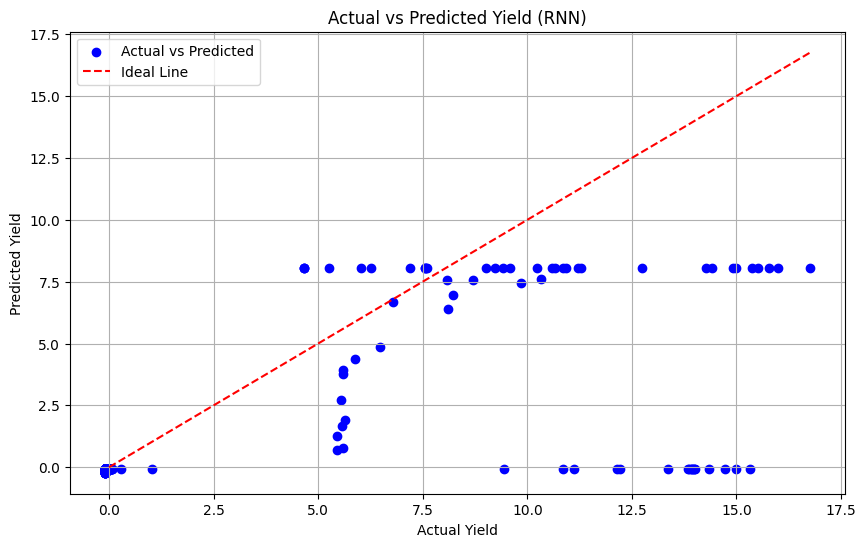

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


df = pd.read_csv('/content/drive/MyDrive/DATASET/crop_yield.csv')


scaler = StandardScaler()
df['Crop_Year_scaled'] = scaler.fit_transform(df[['Crop_Year']])
df['Area_scaled'] = scaler.fit_transform(df[['Area']])
df['Production_scaled'] = scaler.fit_transform(df[['Production']])
df['Annual_Rainfall_scaled'] = scaler.fit_transform(df[['Annual_Rainfall']])
df['Fertilizer_scaled'] = scaler.fit_transform(df[['Fertilizer']])
df['Pesticide_scaled'] = scaler.fit_transform(df[['Pesticide']])
df['Yield_scaled'] = scaler.fit_transform(df[['Yield']])


label_encoder = LabelEncoder()
df['crop_encoded'] = label_encoder.fit_transform(df['Crop'])
df['season_encoded'] = label_encoder.fit_transform(df['Season'])
df['state_encoded'] = label_encoder.fit_transform(df['State'])


features = ['Crop_Year_scaled', 'crop_encoded', 'state_encoded', 'Area_scaled',
            'Production_scaled', 'Annual_Rainfall_scaled', 'Fertilizer_scaled']
target = ['Yield_scaled']

X = df.loc[:, features]
Y = df.loc[:, target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

X_train_ls = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_ls = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
Y_train_ls = Y_train.values


model_rnn = Sequential([
    SimpleRNN(units=100, return_sequences=True, input_shape=(X_train_ls.shape[1], X_train_ls.shape[2])),
    BatchNormalization(),
    Dropout(0.3),  # Adding dropout for regularization
    SimpleRNN(units=100),
    Dense(units=1)  # Output layer
])


optimizer = Adam(learning_rate=0.001)
model_rnn.compile(optimizer=optimizer, loss='mean_absolute_error')


model_rnn.summary()

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

history_rnn = model_rnn.fit(X_train_ls, Y_train_ls, epochs=150, batch_size=32, validation_split=0.2,
                            callbacks=[early_stopping], verbose=1)


Y_pred_rnn = model_rnn.predict(X_test_ls)


mse_rnn = mean_squared_error(Y_test, Y_pred_rnn)
r2_rnn = r2_score(Y_test, Y_pred_rnn)
mae_rnn = mean_absolute_error(Y_test, Y_pred_rnn)

print("RNN Model Results:")
print("Mean Absolute Error:", mae_rnn)
print("R-squared (R2):", r2_rnn)
print("Mean Squared Error:", mse_rnn)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test.values, Y_pred_rnn, color='blue', label='Actual vs Predicted')

max_val = np.max([np.max(Y_test), np.max(Y_pred_rnn)])
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Yield (RNN)')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()


**Multi Layer Perceptron (MLP)**

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8981 - val_loss: 0.0940
Epoch 2/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1354 - val_loss: 0.0786
Epoch 3/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0778 - val_loss: 0.0770
Epoch 4/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0807 - val_loss: 0.0721
Epoch 5/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0750 - val_loss: 0.0746
Epoch 6/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0779 - val_loss: 0.0754
Epoch 7/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0810 - val_loss: 0.0702
Epoch 8/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0713 - val_loss: 0.0735
Epoch 9/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0788 - val_loss: 0.0664
Epoch 10/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0724 - val_loss: 0.0691
Epoch 11/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0858 - val_loss: 0.0629
Epoch 12/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

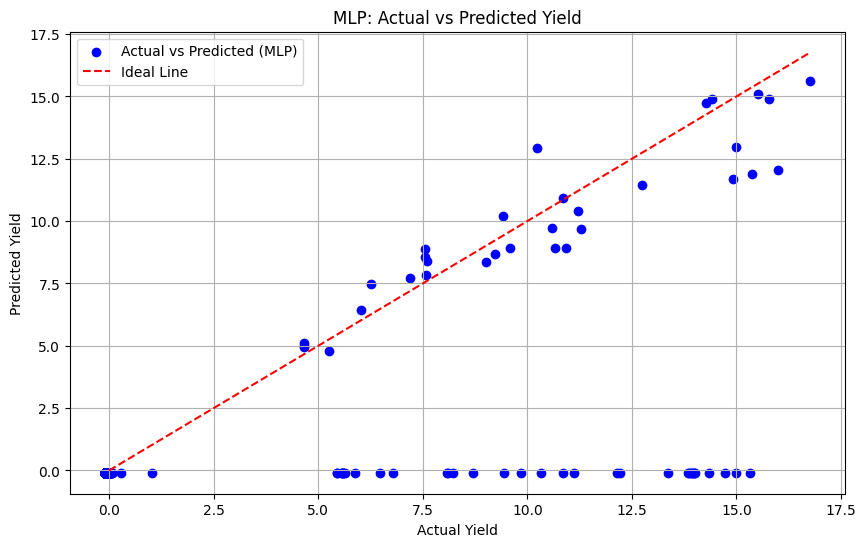

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('/content/drive/MyDrive/DATASET/crop_yield.csv')


scaler = StandardScaler()
df['Crop_Year_scaled'] = scaler.fit_transform(df[['Crop_Year']])
df['Area_scaled'] = scaler.fit_transform(df[['Area']])
df['Production_scaled'] = scaler.fit_transform(df[['Production']])
df['Annual_Rainfall_scaled'] = scaler.fit_transform(df[['Annual_Rainfall']])
df['Fertilizer_scaled'] = scaler.fit_transform(df[['Fertilizer']])
df['Pesticide_scaled'] = scaler.fit_transform(df[['Pesticide']])
df['Yield_scaled'] = scaler.fit_transform(df[['Yield']])


label_encoder = LabelEncoder()
df['crop_encoded'] = label_encoder.fit_transform(df['Crop'])
df['season_encoded'] = label_encoder.fit_transform(df['Season'])
df['state_encoded'] = label_encoder.fit_transform(df['State'])


features = ['Crop_Year_scaled', 'crop_encoded', 'state_encoded', 'Area_scaled',
            'Production_scaled', 'Annual_Rainfall_scaled', 'Fertilizer_scaled']
target = ['Yield_scaled']

X = df[features]
Y = df[target]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=20)


def create_mlp_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model


early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

mlp_model = create_mlp_model()
mlp_history = mlp_model.fit(X_train, Y_train, epochs=150, batch_size=32, validation_split=0.2,
                             callbacks=[early_stopping], verbose=1)

 Y_pred_mlp = mlp_model.predict(X_test)

mae_mlp = mean_absolute_error(Y_test, Y_pred_mlp)
r2_mlp = r2_score(Y_test, Y_pred_mlp)
mse_mlp = mean_squared_error(Y_test, Y_pred_mlp)

print("MLP Model Performance:")
print("Mean Absolute Error:", mae_mlp)
print("R-squared (R2):", r2_mlp)
print("Mean Squared Error:", mse_mlp)


plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_mlp, color='blue', label='Actual vs Predicted (MLP)')
max_val = np.max([np.max(Y_test), np.max(Y_pred_mlp)])
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')
plt.title('MLP: Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()
